# Project: Investigate a Dataset of TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> * Certain columns, like ‘ cast’ and ‘ genres’ , contain multiple values separated by pipe (|) characters.
> * There are some odd characters in the ‘ cast’ column. Don’t worry about cleaning them. You can leave them as is.
> * The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time


## Questions For Analysis TMDb Dataset
> What similar characteristics does the most profitable movie have?

In [41]:
# import packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [42]:
# load data
df = pd.read_csv('csv/tmdb-movies.csv')

# explore data
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [43]:
# explore data tail
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [44]:
# Shape of the data
df.shape

(10866, 21)

In [45]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [46]:
# Check for missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [47]:
# Check for duplicate values
df.duplicated().sum()

1

### Observation from the dataset
* The Currency for columns 'budget', 'revenue','budget_adj', 'revenue_adj' was not given. For the purpose of this analysis I will assume the currency in US dollar.
* The dataset contain lots of movie with budget or revenue have a value of '0'. Calculating the profits of these movies will skew the results heavily. So I will remove them during analysis.
* Unnecessary columns that will not be effective in my analysis will be be drop for better view of the data in focus. Columns like: 'id', 'imbd_id', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count' and 'vote_average'.

### Data Cleaning (Removing the used information from the dataset)

**1. Remove Duplicate Rows**

In [48]:
# Remove duplicate values
df.drop_duplicates(inplace=True)


In [49]:
# check for duplicate values
df.duplicated().sum()

0

**2. Remove the unused columns that are not needed in the analysis process.**

In [50]:
# Drop the unnecessary columns
df.drop(['id', 'overview', 'tagline', 'homepage', 'imdb_id', 'keywords', 'director', 'production_companies', 'release_date', 'vote_average', 'vote_count'], axis=1, inplace=True)

In [51]:
# Check for columns
df.head(1)

,popularity,budget,revenue,original_title,cast,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09


**3. Calculate Net Profit for each movie**

In [52]:
# Create new columns for net profit per movie
df['net_profit'] = df['revenue'] - df['budget']

**4. Drop Missing Value at genres columns**

In [53]:
# Drop the unnecessary rows
df.dropna(how='any', subset=['genres'], inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question: How is the revenue and popularity trend for movies from year to year?

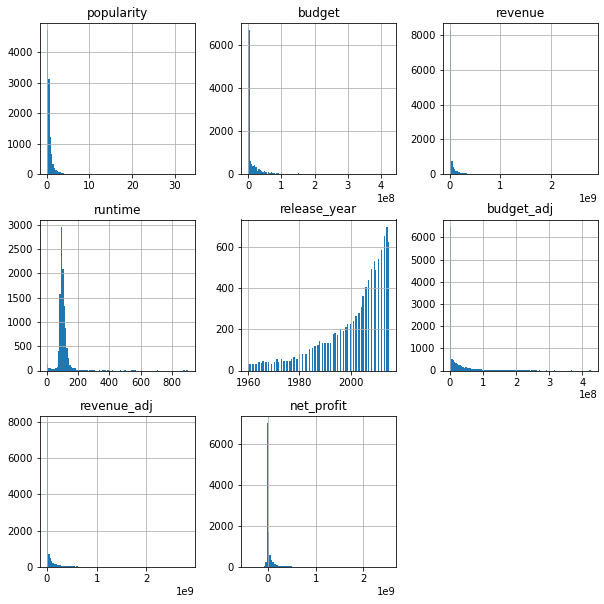

In [54]:
#draw histograms
df.hist(figsize=(10,10), bins=100);


In [55]:
# Calculate revenue of movies from year to year
revenue_by_years = df.groupby(['release_year']).sum()['revenue_adj']
revenue_by_years.head()


release_year
1960    1.069117e+09
1961    2.463622e+09
1962    1.553996e+09
1963    1.334357e+09
1964    2.397193e+09
Name: revenue_adj, dtype: float64

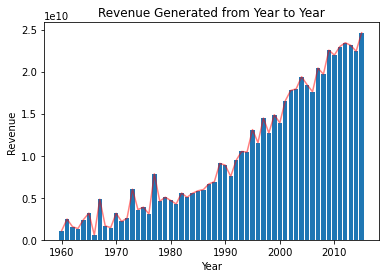

In [56]:
# plot for revenue generated from year to year
plt.bar(revenue_by_years.index, revenue_by_years.values)
plt.plot(revenue_by_years, color='r', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Generated from Year to Year')
plt.show()


In [57]:
# calculate popularity of movies from year to year
popularity_by_years = df.groupby(['release_year']).mean()['popularity']
popularity_by_years.head()


release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
Name: popularity, dtype: float64

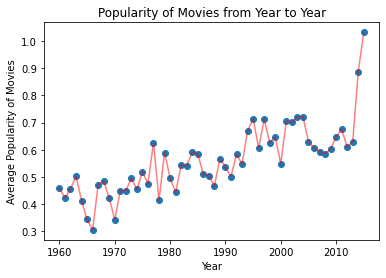

In [58]:
# plot popularity of movies from year to year
plt.scatter(popularity_by_years.index, popularity_by_years.values)
plt.plot(popularity_by_years, color='r', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Average Popularity of Movies')
plt.title('Popularity of Movies from Year to Year')
plt.show()


In [59]:
# Extract the high revenue dataframe
high_revenue = df.revenue.quantile(.75)
high_rev_df = df[df.revenue > high_revenue]
high_rev_df.revenue.describe()


count    2.711000e+03
mean     1.534082e+08
std      1.939356e+08
min      2.414561e+07
25%      4.480000e+07
50%      8.636982e+07
75%      1.772410e+08
max      2.781506e+09
Name: revenue, dtype: float64

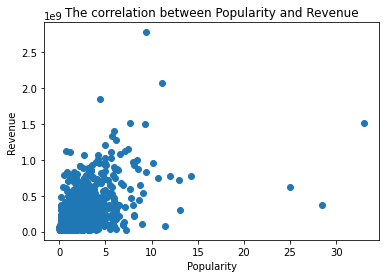

In [60]:
# Draw the scatterplot of the popularity and revenue
plt.scatter(x=high_rev_df.popularity, y=high_rev_df.revenue)
plt.title('The correlation between Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.show()


<a id='conclusions'></a>
## Conclusions



Base on all the discovery above, some conclusions are drawn:
* The revenue of movies increase over decades rapidly.
* There is a positive correlation between increase in revenue and popularity.